# Neural Network classification with PyTorch

Classification is a problem of preidcting whether something is one thing or another (there acan be mutliple things as the options).

## 1. Make classifciation data and get it ready

In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X\n: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X
: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [6]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


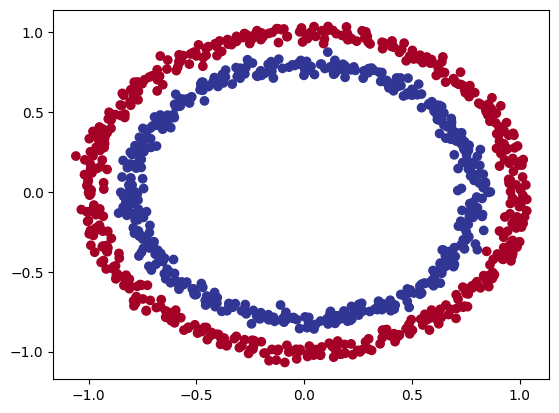

In [7]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note: The data we're working with is often reffered to as a toy dataset, a dataset that is small enough to experiment on but still sizeable enough to practice the fundamentels

In [8]:
### 1.1 Check input and output shapes

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# View the first examples of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")


Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensor and create train and test splits

In [11]:
import torch
torch.__version__

'2.5.1+cu121'

In [12]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [13]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [15]:
n_samples

1000

 ## 2. Building a model

 Let's build a model to classify our blue and red dots.

 To do so, we want to:
 1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
 2. Construct a model (by subclassing `nn.Module`)
 3. Define a loss funciton and optimizer
 4. Create a trianing and test loop

In [16]:
# import Pytorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [17]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Moduel` (almost all models in PyTordh subclass `nn.Modul`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation of the model)
4. Instantiate an instance of our model class and send it to the target `device`


In [18]:
# 1. Construct a model that subclasses nn.module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, # takes in 2 features and upscales to 5 features
                                 out_features=5)
        self.layer_2 = nn.Linear(in_features=5, # takes in 5 features from previous layer and outputs a single feature (same shape as y)
                                 out_features=1)

        # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
device

'cuda'

In [21]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
# Let's replicate the model above using nn.Sequential()
# model_0 = nn.Sequential(
#     nn.Linear(in_features=2, out_features=2),
#     nn.Linear(in_features=5, out_features=1)
# ).to(device)

# model_0

In [23]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3661,  0.5166],
                      [ 0.6666, -0.3995],
                      [ 0.5874, -0.5640],
                      [ 0.5521,  0.4965],
                      [-0.6136, -0.3348]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.2133,  0.1951,  0.6006,  0.3476, -0.5401], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3035,  0.0613,  0.1309,  0.4064, -0.2347]], device='cuda:0')),
             ('1.bias', tensor([-0.2703], device='cuda:0'))])

In [24]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 lables:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[ 0.1602],
        [ 0.4875],
        [-0.3733],
        [ 0.3101],
        [ 0.1414],
        [ 0.3372],
        [ 0.8506],
        [ 0.8168],
        [-0.3942],
        [ 0.5151]], device='cuda:0')

First 10 lables:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [25]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem speicifc.

For example for regression you might want
MAE or MSE (mean absolute error or mean square error)

For classification you might want binary cross entropy or categorical cross entropy (cross entropy)

As a reminder, the loss function measures how **wrong** our predictions are.

And for optimzers, two of the most common and useful are SGD and Adam, however PyTorch has many built in options

* For the loss function we're going to use `torch.nn.BECWithLogitLoss()`


In [26]:
# Setup the loss funciton
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid activation function built in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [27]:
# Calculate accuray - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

### 3. Train model
 To train our model, we're going to need to build a training loop with the following steps
 1. Forward pass
 2. Claculate loss
 3. Optimizer zero grad
 4. Loss backward (backprop)
 5. Optimizer (gradient descent)



### 3.1 Going from raw logits -> prediciton probabilities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into prediction probabilites by passing htem to some kind of activation function (e.g sigmoid for binary cross entropy and softmax for multiclass classification)


In [28]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()

with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.1602],
        [ 0.4875],
        [-0.3733],
        [ 0.3101],
        [ 0.1414]], device='cuda:0')

In [29]:
y_test[:5]


tensor([1., 0., 1., 0., 1.])

In [30]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5400],
        [0.6195],
        [0.4077],
        [0.5769],
        [0.5353]], device='cuda:0')

For our prediciton probability values,  we need to preform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, y=0 (class 0)


In [31]:
# Find the predictive layers
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pre probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
# Get rid of extra dimension.
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 0., 1., 1.], device='cuda:0')

In [32]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [33]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put the data into the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build trianing and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Calculate loss/accuracy
    loss = loss_fn(torch.sigmoid(y_logits),
                   y_train)
    loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                   y_train)

    acc = accuracy_fn(y_true=y_train,
                      y_pred = y_pred)

    # Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # Optimizer step (gradient descent)
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")






Epoch: 0 | Loss: 0.71603, Acc: 52.25 | Test loss: 0.73326, Test acc: 48.00%
Epoch: 10 | Loss: 0.70653, Acc: 51.12 | Test loss: 0.72103, Test acc: 47.50%
Epoch: 20 | Loss: 0.70240, Acc: 50.50 | Test loss: 0.71488, Test acc: 48.00%
Epoch: 30 | Loss: 0.70015, Acc: 50.62 | Test loss: 0.71115, Test acc: 48.00%
Epoch: 40 | Loss: 0.69869, Acc: 50.12 | Test loss: 0.70854, Test acc: 48.50%
Epoch: 50 | Loss: 0.69762, Acc: 50.12 | Test loss: 0.70656, Test acc: 48.00%
Epoch: 60 | Loss: 0.69680, Acc: 49.75 | Test loss: 0.70499, Test acc: 47.50%
Epoch: 70 | Loss: 0.69615, Acc: 49.88 | Test loss: 0.70370, Test acc: 47.50%
Epoch: 80 | Loss: 0.69563, Acc: 50.00 | Test loss: 0.70262, Test acc: 47.00%
Epoch: 90 | Loss: 0.69519, Acc: 50.00 | Test loss: 0.70170, Test acc: 47.00%


In [34]:
loss_fn

BCEWithLogitsLoss()

## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything

So to inspect it, let's visualize

To do so, we're going to import a function called `plot_decision_boundary()`



In [35]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

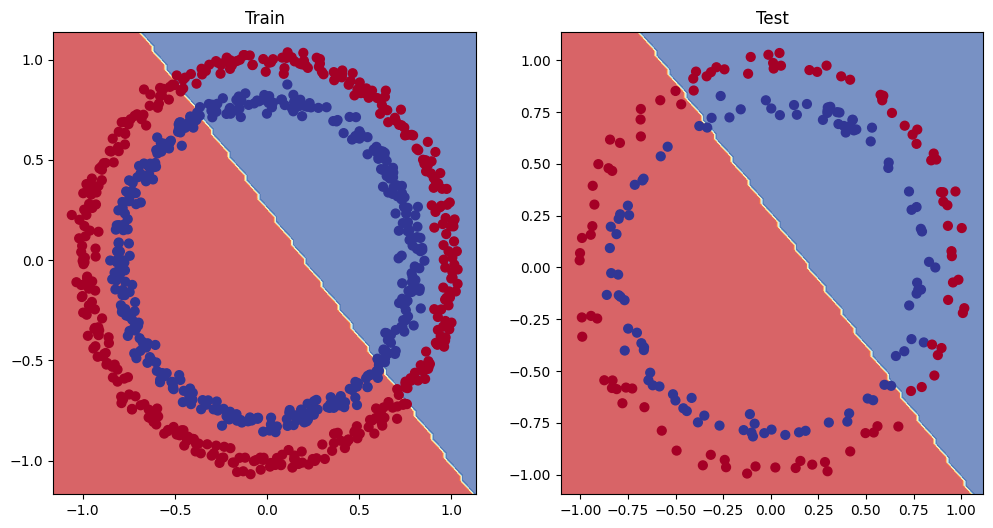

In [36]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)